# Homework №4

## 1. Quadratic function (8 points)

* Optimal value $f^*$ and optimal point $x^*$ are considered to be known (see code in sample file **test_function_quad.ipynb**).
* In all cases images of intermediate points and plots of residuals $f\left(x^k\right) - f^*$ and $\left|\left| x^k - x^* \right|\right|$ shall be made.
* Axes scales on $x_1, x_2$ plots shall be equal.
* For exact line search derive the formulae for the step-size from 1-dimensional optimization problem (with arbitrary direction $p$ as parameter)

$$f(x + \gamma p) = \dfrac{1}{2} (Q(x + \gamma p), x + \gamma p) + (c, x + \gamma p) \rightarrow \min_{\gamma \in \mathbb{R}}$$

*1.* Implement gradient descent

$$x^{k+1} = x^k - \gamma_k \nabla f \left( x^k \right)$$

(a) (3 points) with step-size $\gamma_k$ chosen optimally (exact line search).

(b) (2 points) with step-size chosen by golden-ratio search method.

(c) (1 point) with step-size chosen by Armijo rule.

*2.* Implement coordinate descent with interleaving directions $e_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, e_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$:

$$x^{k+1} = x^k - \gamma_k e_{i_k},~i_k \in \{1,2\}$$

(a) (1 point) with step-size chosen optimally (exact line search).

(b) (1 point) with step-size chosen by Fibonacci method.

### Solution to 1.1: Gradient descent

Main function $f(x)$:

$$f(x) = \dfrac{1}{2} (Qx, x) + (c, x)$$

Gradient $\nabla f(x)$:

$$\nabla f(x) = Qx + c$$

Minimal point $x^*$:

$$x^* = - Q^{-1} c$$

Minimal value $f^*$:

$$f^* = - \dfrac{1}{2} \left( c, Q^{-1} c \right) = \dfrac{1}{2} \left( c, x^* \right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc
%matplotlib inline

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
def generate_quad_matrices(n):
    
    m = np.random.randint(2, high=20)
    
    Q_sing = np.random.rand(m, n)
    
    Q = np.dot(np.transpose(Q_sing), Q_sing)
    
    c = np.random.rand(n)
    
    return Q, c

def quad_func(Q, c, x):
    
    return np.dot(0.5 * np.dot(Q, x) + c, x)

def quad_grad(Q, c, x):
    
    return np.dot(Q, x) + c

def exact_quad_solution(Q, c):
    
    x_min = -np.dot(np.linalg.inv(Q), c)
    
    f_min = 0.5 * np.dot(c, x_min)
    
    return x_min, f_min

In [3]:
def gradient_descent(x_0, Q, c, step_size_func, eps, **kw):
    
    x_k = np.copy(x_0)
    x_k1 = np.copy(x_0)
    
    x_arr = np.copy(x_0)
    f_arr = np.array([quad_func(Q, c, x_0)])
    
    p_k = -quad_grad(Q, c, x_k)
    
    while np.linalg.norm(p_k) > eps:
        
        x_k = x_k1
        
        p_k = -quad_grad(Q, c, x_k)
        
        x_k1 = x_k + step_size_func(Q, c, x_k, p_k, **kw) * p_k
        
        x_arr = np.vstack((x_arr, x_k1))
        f_arr = np.append(f_arr, quad_func(Q, c, x_k1))
        
    return x_k1, x_arr, f_arr

def iters_image(N, n, Q, c, x_arr, alg_type, search_type):
    
    x = np.linspace(-N/2, N/2, N+n)
    X = np.repeat([x], N+n, axis=0)
    y = np.linspace(N/2, -N/2, N+n)
    Y = np.transpose(np.repeat([y], N+n, axis=0))

    f_points = np.dstack((X, Y))

    z = f_points.reshape((N+n)**2, 2)

    Z = np.array(map(lambda m: quad_func(Q, c, m), z)).reshape((N+n), (N+n))

    [x_min, y_min], f_min = exact_quad_solution(Q, c)

    fig, ax = plt.subplots(1, 1, figsize=(8, 9))
    
    fig.suptitle('{0} descent with {1} search'.format(alg_type, search_type), fontsize = 18)

    im = ax.imshow(Z, interpolation='spline16', cmap=cm.coolwarm, extent=[-N/2, N/2, -N/2, N/2])
    ax.scatter(x_min, y_min, color='black', marker='*')
    
    for i in range(x_arr.shape[0] - 1):
        
        x_slice = np.transpose(x_arr[i:i+2])
        ax.plot(x_slice[0], x_slice[1], color='black')
    
    ax.set_title('$$y = (Q x, x) + (c,x)$$\n$$Q = [[{0}, {1}], [{2}, {3}]],~c = [{4}, {5}]$$\n$$x^* = [{6}, {7}],~y^*={8}$$'
                 .format(str(round(Q[0,0],2)), str(round(Q[0,1],2)), str(round(Q[1,0],2)), str(round(Q[1,1],2)),
                         str(round(c[0],2)), str(round(c[1],2)), str(round(x_min,4)), str(round(y_min,4)), str(round(f_min,4))),
                 fontsize=18)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    plt.show()
    
def residuals_plot(x_arr, x_min, f_arr, f_min, search_type):

    f, ax = plt.subplots(4, 1, figsize=(10, 14))

    f.suptitle('Function and value residuals for {} search'.format(search_type), fontsize=20)

    ax[0].plot(f_arr - f_min)
    ax[0].set_title('Function residual')
    ax[1].semilogy(f_arr - f_min)
    ax[1].set_title('Logarithmic function residual')
    ax[2].plot(np.linalg.norm(x_arr - x_min, axis=1))
    ax[2].set_title('Value residual (Euclidean norm)')
    ax[3].semilogy(np.linalg.norm(x_arr - x_min, axis=1))
    ax[3].set_title('Logarithmic value residual (Euclidean norm)')
    plt.show()
    
n = 2

Q, c = generate_quad_matrices(n)

x_min, f_min = exact_quad_solution(Q, c)

x_0 = np.array([3., -4.])
eps = 1e-6

#### (a) Exact line search

$$f(x + \gamma p) = \dfrac{1}{2} (Q(x + \gamma p), x + \gamma p) + (c, x + \gamma p) \rightarrow \min_{\gamma \in \mathbb{R}}$$

$$\gamma^* = -\dfrac{\left(Qx + c, p\right)}{(Qp,p)}$$

For gradient descent $p = -\nabla f(x)$:

$$\gamma^* = \dfrac{\left(p, p\right)}{(Qp,p)}$$

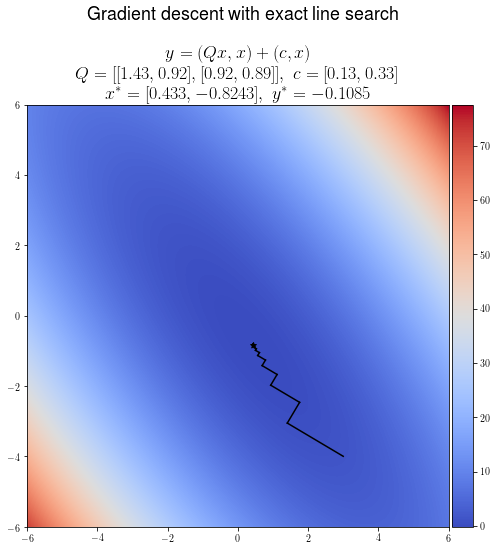

In [4]:
def exact_line_search(Q, c, x, p, **kw):
    
    return - np.dot(np.dot(Q,x) + c, p) / np.dot(np.dot(Q, p), p)

x_m, x_arr, f_arr = gradient_descent(x_0, Q, c, exact_line_search, eps)

N = 12
n = 300
alg_type = 'Gradient'
search_type = 'exact line'
iters_image(N, n, Q, c, x_arr, alg_type, search_type)

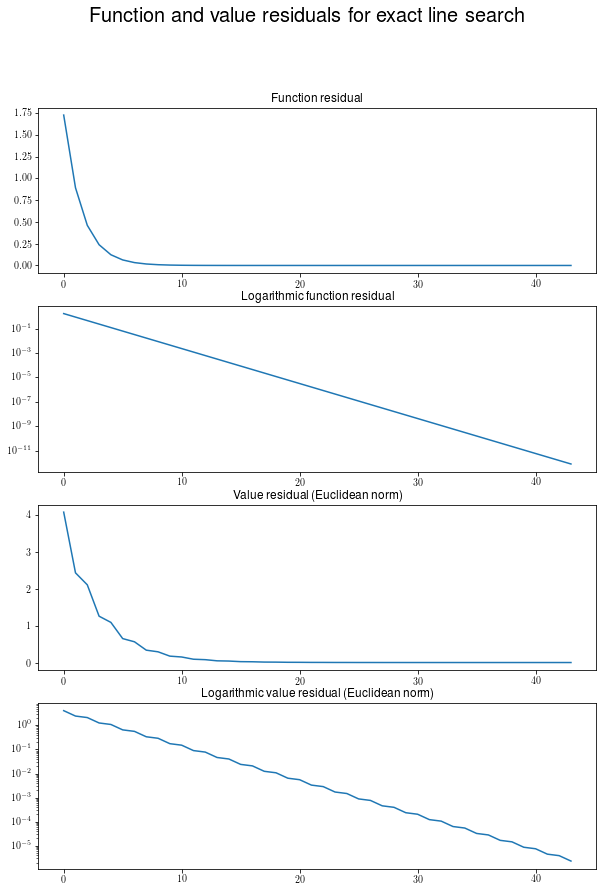

In [5]:
residuals_plot(x_arr, x_min, f_arr, f_min, search_type)

#### (b) Golden ratio search

$$f(x + \gamma p) = \gamma^2 \cdot \underbrace{\dfrac{1}{2} \left( Qp, p \right)}_{A} + \gamma \cdot \underbrace{\left( Qx + c, p \right)}_{B = (\nabla f(x), p)} + \underbrace{\dfrac{1}{2} \left( Qx, x \right) + (c, x)}_{C = f(x)}$$

$$f(x + \gamma p) = A \gamma^2 + B \gamma + C$$

$f(x + \gamma p)$ is unimodal function and its minimum can be found via golden ratio search - let's divide the interval $[a, b]$ into 2 parts by point $c$ with the following ratio:

$$\dfrac{c - a}{b - c} = \dfrac{b - a}{c - a}$$

And then choose 2 minimal points out of 3 and continue, until we get to the minimal point of the fucntion.

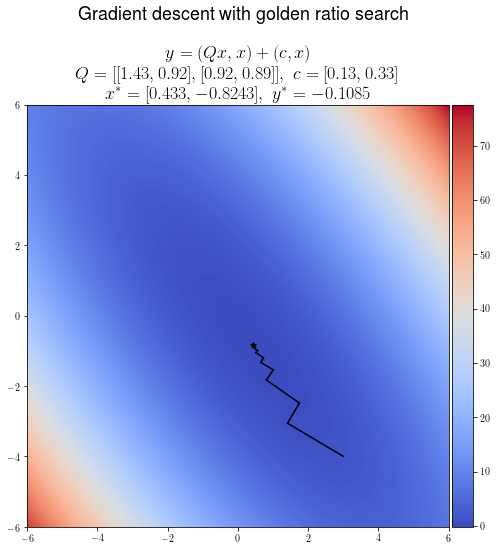

In [6]:
def gs_func(gamma, Q, c, x, p):
    
    A = 0.5 * np.dot(np.dot(Q, p), p)
    
    B = np.dot(quad_grad(Q, c, x), p)
    
    C = quad_func(Q, c, x)
    
    return A * gamma**2 + B * gamma + C

def golden_search(Q, c, x, p, **kw):
    
    f = kw['f']
    a = kw['a']
    b = kw['b']
    eps = kw['eps_gs']
    
    tau = (np.sqrt(5) + 1) / 2.
    
    y = a + (b - a) / tau**2
    
    z = a + (b - a) / tau
    
    while b - a > eps:
        
        if f(y, Q, c, x, p) <= f(z, Q, c, x, p):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        
    return (a + b) / 2.

GS_LIM = 5.
EPS_GS = 0.1
x_m, x_arr, f_arr = gradient_descent(x_0, Q, c, golden_search, eps, f=gs_func, a=-GS_LIM, b=GS_LIM, eps_gs=EPS_GS)

search_type = 'golden ratio'
iters_image(N, n, Q, c, x_arr, alg_type, search_type)

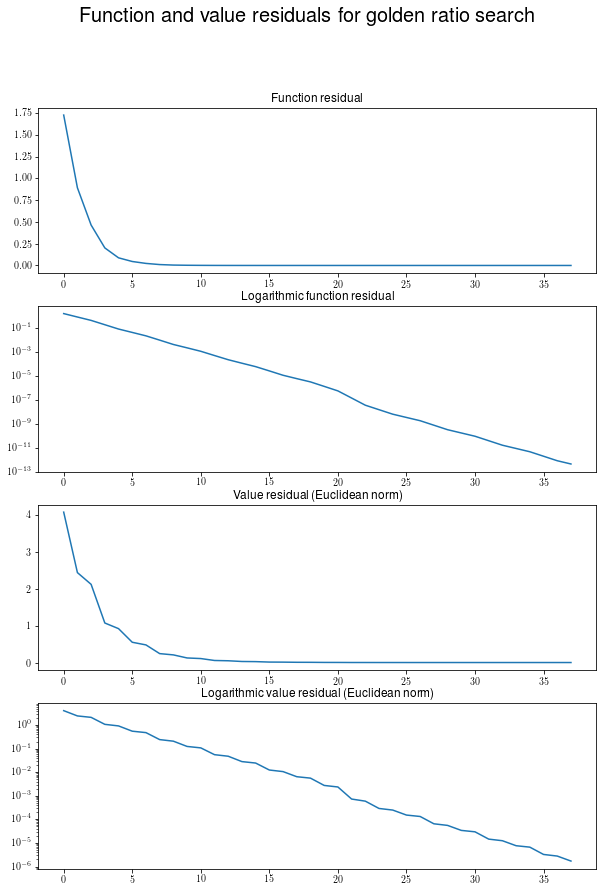

In [7]:
residuals_plot(x_arr, x_min, f_arr, f_min, search_type)

#### (c) Armijo rule search

We should choose such $\gamma$ that the following inequality will be satisfied for sufficiently small positive $\mu$:

$$f(x + \gamma p) \leq f(x) + \mu \gamma (\nabla f(x), p)$$

If the equality is not satisfied, multiply $\gamma$ by $\beta \in (0, 1)$ and check again.

$\mu$ usually in $(0.01, 0.3)$, $\beta$ usually in $(0.1, 0.5)$.

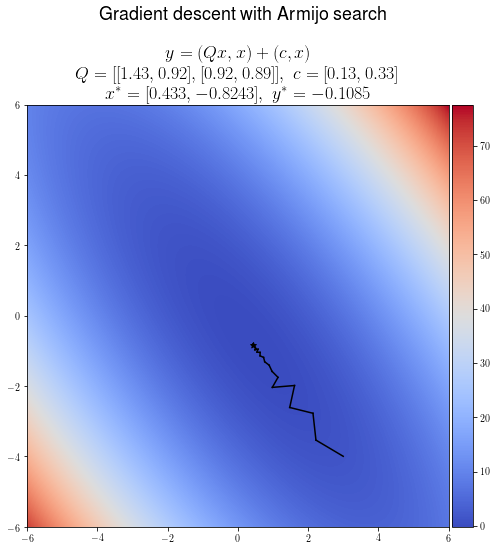

In [8]:
def armijo(Q, c, x, p, **kw):
    
    mu = kw['mu']
    beta = kw['beta']
    
    gamma = 1.
    
    while(quad_func(Q, c, x + gamma*p) > quad_func(Q, c, x) + mu * gamma * np.dot(quad_grad(Q, c, x), p)):
        
        gamma *= beta
        
    return gamma

MU = 0.1
BETA = 0.5
x_m, x_arr, f_arr = gradient_descent(x_0, Q, c, armijo, eps, mu=MU, beta=BETA)

search_type = 'Armijo'
iters_image(N, n, Q, c, x_arr, alg_type, search_type)

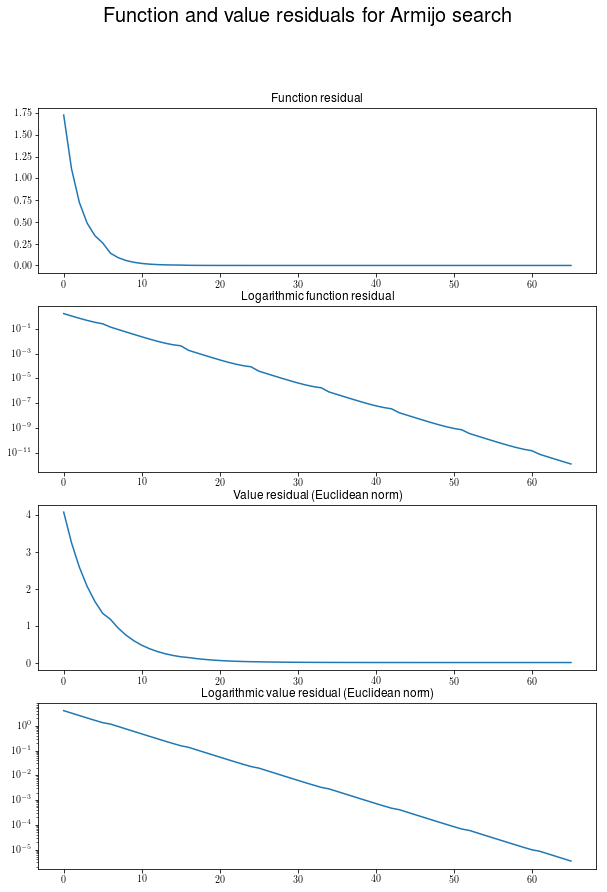

In [9]:
residuals_plot(x_arr, x_min, f_arr, f_min, search_type)

### Solution to 1.2: Coordinate descent

In [10]:
def coordinate_descent(x_0, Q, c, step_size_func, eps, **kw):
    
    x_k = np.copy(x_0)
    x_k1 = np.copy(x_0)
    
    x_arr = np.copy(x_0)
    f_arr = np.array([quad_func(Q, c, x_0)])
    
    i = 0
    
    while np.linalg.norm(quad_grad(Q, c, x_k)) > eps:
        
        x_k = x_k1
        
        p_k = -(i % 2) * np.array([0., 1.]) - (1 - i % 2) * np.array([1., 0.])
        
        x_k1 = x_k + step_size_func(Q, c, x_k, p_k, **kw) * p_k
        
        x_arr = np.vstack((x_arr, x_k1))
        f_arr = np.append(f_arr, quad_func(Q, c, x_k1))
        
        i += 1
        
    return x_k1, x_arr, f_arr

#### (a) Exact line search

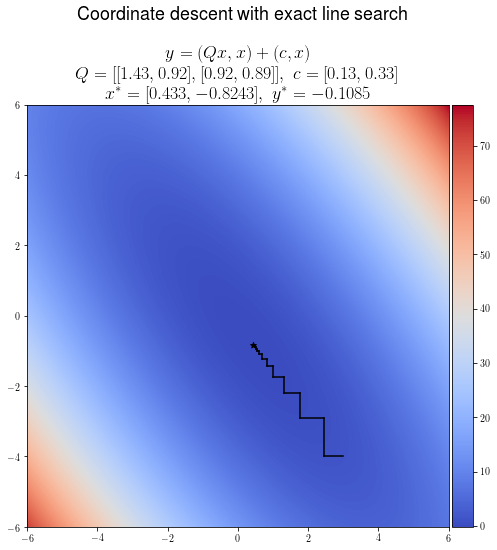

In [11]:
x_m, x_arr, f_arr = coordinate_descent(x_0, Q, c, exact_line_search, eps)

alg_type = 'Coordinate'
search_type = 'exact line'
iters_image(N, n, Q, c, x_arr, alg_type, search_type)

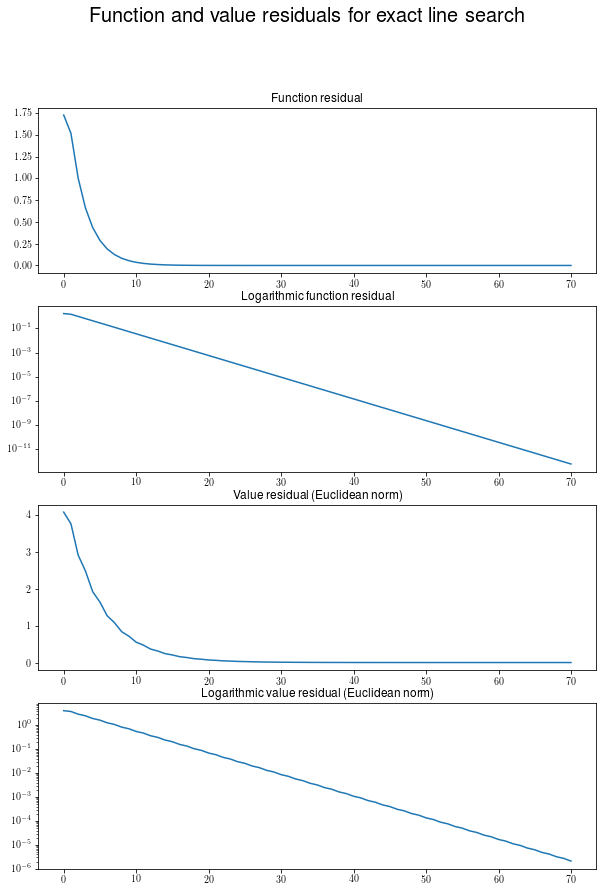

In [12]:
residuals_plot(x_arr, x_min, f_arr, f_min, search_type)

#### (b) Fibonacci method

For each point evaluation $i$ among $N - 1$ in the interval $[a, b]$ (where $F_0 = F_1 = 1$):

$$x_1 = \dfrac{F_{N-i-1}}{F_{N-i+1}} (b - a) + a$$
$$x_2 = \dfrac{F_{N-i}}{F_{N-i+1}} (b - a) + a$$

If $f \left( x_2 \right) > f \left( x_1 \right)$ then $[a, b] = [a, x_2]$.

If $f \left( x_2 \right) \leq f \left( x_1 \right)$ then $[a, b] = [x_1, b]$.

Repeat for all $i \in N-1$.

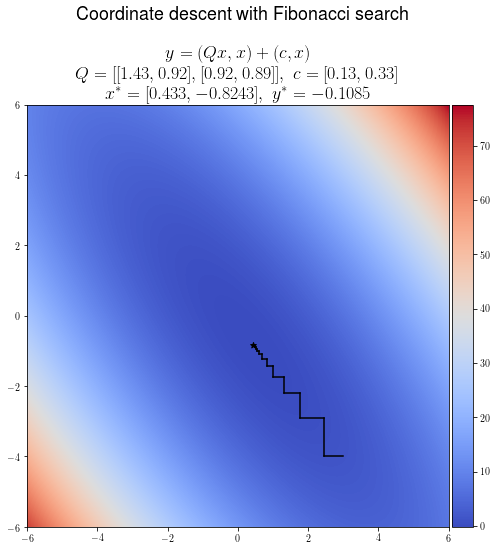

In [13]:
def fibonacci_search(Q, c, x, p, **kw):
    
    fib = lambda n : pow(2<<n,n+1,(4<<2*n)-(2<<n)-1)%(2<<n)
    
    f = kw['f']
    a = kw['a']
    b = kw['b']
    N = kw['N']
    
    for i in range(1, N - 1):
        
        x_1 = 1. * fib(N-i) / fib(N-i+2) * (b - a) + a
        x_2 = 1. * fib(N-i+1) / fib(N-i+2) * (b - a) + a
        
        if (f(x_2, Q, c, x, p) > f(x_1, Q, c, x, p)):
            
            b = x_2
            
        else:
            
            a = x_1
        
    return (a + b) / 2.

FS_LIM = 5.
N_fs = 40
x_m, x_arr, f_arr = coordinate_descent(x_0, Q, c, fibonacci_search, eps, f=gs_func, a=-FS_LIM, b=FS_LIM, N=N_fs)

search_type = 'Fibonacci'
iters_image(N, n, Q, c, x_arr, alg_type, search_type)

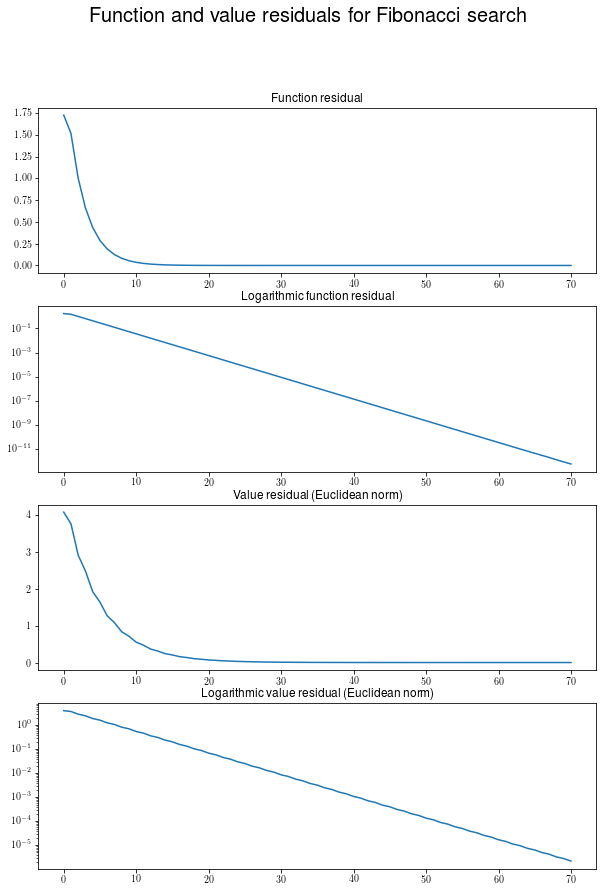

In [14]:
residuals_plot(x_arr, x_min, f_arr, f_min, search_type)

## 2. Linear programming

Consider a linear dynamical system with state $x(t) \in \mathbb{R}^n, t = 0, \ldots, N$ and input signal $u(t) \in \mathbb{R}$, for $t = 0, \ldots, N-1$. The dynamics of the system is given by the linear recurrence

$$x(t+1) = A x(t) + b u(t), \qquad t = 0, \ldots, N-1$$

where $A$ and $b$ are given. We assume that the initial state is zero $x(0) = 0$.

The task is to choose the inputs $u(0), \ldots, u(N-1)$ in order to minimize the total fuel consumed, which is given by

$$F = \sum_{t=0}^{N-1} f \left( u(t) \right)$$

subject to the constraint that $x(N) = x_{des}$, where $N$ is the (given) time horizon, and $x_{des}$ is the (given) desired final or target state. The function $f$ (fuel map) for the controller, and gives the amount of fuel used as a function of the actuator signal amplitude. Use

$$ f(a) =
\left \{\begin{aligned}
            |a|, & |a| \leq 1 \\
            2|a|-1, & |a| > 1
        \end{aligned} \right.
$$

In this case fuel use is proportional to the absolute value of the actuator signal, for actuator signals between 1 and 1; for larger actuator signals the marginal fuel efficiency is half.

1. (2 points) Formulate the minimum fuel optimal control problem as an LP.
2. (1 point) Solve the problem for:
$$N = 30,~~A = \begin{bmatrix}
    -1 & 0.4 & 0.8 \\
    1 & 0 & 0 \\
    0 & 1 & 0
\end{bmatrix},~~b = [1~~~0~~~0.3]^T,~~x_{des} = [7~~~2~~~-6].$$
Provide the code and figures for $x(t)$ (every component in its own plot) and $u(t)$.
3. (3 points) Sensitivity issue. How sensititve the obtained control $u^*(t)$ to every component of $x_{des}$? Validate this fact numerically by perturbing $x_{des}$ and analytically (based on largange multiplier values).

### Solution to 2.1: Formulating the LP problem

Let's write explicitly, what form vector $x(t)$ will have in each time step $t$:

$$x(t+1) = A x(t) + b u(t), \qquad x(0) = 0$$

$t = 0: \qquad \qquad x(1) = b u(0)$

$t = 1: \qquad \qquad x(2) = A x(1) + b u(1) = A b u(0) + b u(1)$

$t = 2: \qquad \qquad x(3) = A x(2) + b u(2) = A^2 b u(0) + A b u(1) + b u(2)$

$\vdots$

$t = N: \qquad \qquad x(N) = A x(N-1) + b u(N-1) = A^{N-1} b u(0) + A^{N-2} b u(1) + \ldots + A b u(N-2) + b u(N-1) = x_{des}$

It's clear that the previous line can be rewritten in the form of matrix equation:

$$C u = x_{des}$$

where $C$ is the control matrix:

$$C = \left[ A^{N-1} b,~A^{N-2} b,~\ldots,~A b,~b \right]$$

and $u$ is the vector with $u(t)$ as elements:

$$u = \left[ u(0),~u(1),~\ldots,~u(N-2),~u(N-1) \right]^T$$

Let's deal with the actuator signal amplitude $f(a)$. Let's intriduce the new variable $s$ which will envelop both types of signals: $|a|$ and $2|a|-1$ (as in the example with the $\infty$-norm):

$$|a| \leq s \qquad \text{and} \qquad 2|a|-1 \leq s$$

As soon as $a$ is taking the role of one element of $u_i$ in vector $u$, there should be as many variable $s_i$ as $u_i$, each with 4 constraints:

$$
\left \{\begin{aligned}
            &-s_i \leq u_i \leq s_i \\
            &-\dfrac{s_i + 1}{2} \leq u_i \leq \dfrac{s_i + 1}{2}
        \end{aligned} \right.
\qquad \Longleftrightarrow \qquad
\left \{\begin{aligned}
            -u_i - s_i &\leq 0 \\
            u_i - s_i &\leq 0 \\
            -2u_i - s_i &\leq 1 \\
            2u_i - s_i &\leq 1
        \end{aligned} \right.
$$

The traget function is rewritten as follows:

$$F = \sum_{t=0}^{N-1} f \left( u(t) \right) = 1^T s$$

where $s = [s_0, s_1, \ldots, s_{N-2}, s_{N-1}]^T$

The LP problem is formulated the following way:

$$\min_{u, s} 1^T s\\
\begin{aligned}
            \text{s.t.}: \qquad -u_i - s_i &\leq 0,~\forall i = \{0, \ldots, N-1\}\\
            u_i - s_i &\leq 0,~\forall i\\
            -2u_i - s_i &\leq 1,~\forall i\\
            2u_i - s_i &\leq 1,~\forall i\\
            C u &= x_{des}
        \end{aligned}
$$

### Solution to 2.2: Calculating optimal $u^*$

In [15]:
from pulp import *

def optimal_thrust_lp(N, A, b, x_des, plots=True):
    
    prob_default = LpProblem("optimal_thrust", LpMinimize)
    
    sort_shift = 10**len(str(N))

    time_interval_index = [i for i in range(sort_shift, sort_shift + N)]

    u_vars = LpVariable.dicts('u', time_interval_index, cat='Continuous')
    s_vars = LpVariable.dicts('s', time_interval_index, cat='Continuous')
    
    prob_default += lpSum([s_vars[i] for i in range(sort_shift, sort_shift + N)])
    
    for i in range(sort_shift, sort_shift + N):
        prob_default += -u_vars[i] - s_vars[i] <= 0
        prob_default += u_vars[i] - s_vars[i] <= 0
        prob_default += -2*u_vars[i] - s_vars[i] <= 1
        prob_default += 2*u_vars[i] - s_vars[i] <= 1
        
    C = np.copy(b)
    A_n = np.copy(b)

    for i in range(N-1):

        A_n = np.dot(A, A_n)
        C = np.vstack((A_n, C))

    C = np.transpose(C)

    for (j, x_j) in enumerate(x_des):
        prob_default += lpSum([C[j,i] * u_vars[i + sort_shift] for i in range(N)]) == x_j
        
    prob_default.solve()

    print("Status: {}".format(LpStatus[prob_default.status]))

#     for v in prob_default.variables():
#         print("{0} = {1}".format(v.name[:2]+v.name[3:], v.varValue))

    print("\nOptimal fuel consumption = {}".format(value(prob_default.objective)))

    ofc = value(prob_default.objective)
    
    u_values = map(lambda x: x.varValue, prob_default.variables()[N:])
    
    print('\nOptimal u values:')
    print(u_values)
    
    x = np.zeros((N, 3))

    for i in range(1, N+1):

        x[i-1] = np.dot(C[:, -i:], u_values[:i])
    
    if plots:
    
        f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,8))
        f.suptitle('Optimal thrust with $N = {0}$ iterations'.format(N))
        ax1.plot(np.arange(N), u_values)
        ax1.set_title('$u^i$', fontsize=18)
        ax2.plot(np.arange(N), x[:,0])
        ax2.set_title('$x_1^i$', fontsize=18)
        ax3.plot(np.arange(N), x[:,1])
        ax3.set_title('$x_2^i$', fontsize=18)
        ax4.plot(np.arange(N), x[:,2])
        ax4.set_title('$x_3^i$', fontsize=18)
        plt.show()
    
    return np.array(u_values), x, ofc

Status: Optimal

Optimal fuel consumption = 17.32356783

Optimal u values:
[0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.24662416, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 1.0, -0.69888147, 1.0, 0.0, 0.0, 0.0, 0.0, 3.1890311]


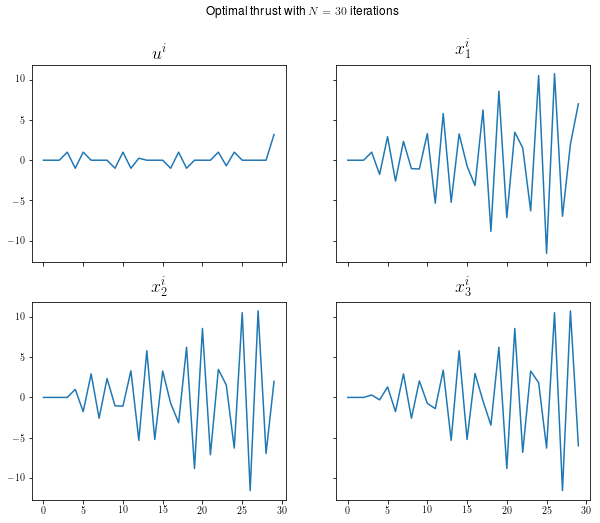

In [16]:
N = 30
A = np.array([[-1., 0.4, 0.8], [1., 0., 0.], [0., 1., 0.]])
b = np.array([1., 0., 0.3])
x_des = np.array([7., 2., -6.])

u_0, x, ofc = optimal_thrust_lp(N, A, b, x_des)

### Solution to 2.3: Checking the sensitivity of $u^*$ to $x_{des}$ perturbations

**Perturbing 1st coordinate**

In [17]:
x_des_1 = np.array([6.5, 2., -6.])

u_1, x_1, ofc_1 = optimal_thrust_lp(N, A, b, x_des_1, plots=False)

print('\nDifference between u values of x_des = {} and x_des = {}:'.format(x_des, x_des_1))
print(u_0 - u_1)
print('\n||u_0 - u_1||_2 = {}'.format(np.linalg.norm(u_0 - u_1)))

Status: Optimal

Optimal fuel consumption = 16.25097867

Optimal u values:
[0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.21814144, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 1.0, -0.51149693, 1.0, 0.0, 0.0, 0.0, 0.0, 2.7606701]

Difference between u values of x_des = [ 7.  2. -6.] and x_des = [ 6.5  2.  -6. ]:
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.02848272  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.18738454
  0.          0.          0.          0.          0.          0.428361  ]

||u_0 - u_1||_2 = 0.468420086558


**Perturbing 2nd coordinate**

In [18]:
x_des_2 = np.array([7., 2.5, -6.])

u_2, x_2, ofc_2 = optimal_thrust_lp(N, A, b, x_des_2, plots=False)

print('\nDifference between u values of x_des = {} and x_des = {}:'.format(x_des, x_des_2))
print(u_0 - u_2)
print('\n||u_0 - u_2||_2 = {}'.format(np.linalg.norm(u_0 - u_2)))

Status: Optimal

Optimal fuel consumption = 18.202913933

Optimal u values:
[0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.68645269, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 1.0, -0.081227843, 1.0, 0.0, 0.0, 0.0, 0.0, 3.7176167]

Difference between u values of x_des = [ 7.  2. -6.] and x_des = [ 7.   2.5 -6. ]:
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.43982853  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.61765363
  0.          0.          0.          0.          0.         -0.5285856 ]

||u_0 - u_2||_2 = 0.924309404515


**Perturbing 3rd coordinate**

In [19]:
x_des_3 = np.array([7., 2., -6.5])

u_3, x_3, ofc_3 = optimal_thrust_lp(N, A, b, x_des_3, plots=False)

print('\nDifference between u values of x_des = {} and x_des = {}:'.format(x_des, x_des_3))
print(u_0 - u_3)
print('\n||u_0 - u_3||_2 = {}'.format(np.linalg.norm(u_0 - u_3)))

Status: Optimal

Optimal fuel consumption = 17.57200134

Optimal u values:
[0.0, 0.0, -0.31132874, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.5225032, 0.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.8690847]

Difference between u values of x_des = [ 7.  2. -6.] and x_des = [ 7.   2.  -6.5]:
[ 0.          0.          0.31132874  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.27587904  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.30111853
  0.          0.          0.          0.          0.          0.3199464 ]

||u_0 - u_3||_2 = 0.605039583039


Let's look at the dual problem:

$$\max_{\alpha, \beta, \gamma, \Delta, \theta} -\gamma^T 1 - \Delta^T 1 - \theta^T x_{des}\\
\begin{aligned}
            \text{s.t.}: \alpha, \beta, \gamma, \Delta &\geq 0,\\
            \alpha - \beta + 2\gamma - 2\Delta &= C^T \theta,\\
            \alpha + \beta + \gamma + \Delta &\leq 1.
        \end{aligned}
$$

As soon as perturbation in one component of $x_{des}$ affects only vector $\theta$, which has 3 components, it should mean that we change only 3 components of the variable in the primal problem.

It is validated by the numerical perturbations in previous lines. 4 different components for the 3rd components point out that the perturbation was greater in terms of sensitivity.